Import **libraries**

In [21]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization

# import metrics to compute accuracy (Evaluate)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

from sklearn.datasets import load_iris

Import **Data**

In [2]:
path='/content/drive/MyDrive/Dataset/Real Data/Room1/Room1-train.csv'
data=pd.read_csv(path)
data.head(1300)

,24:d3:f2:a7:b3:cd,b4:74:9f:ba:83:34,b0:89:00:74:7c:84,9c:d6:43:cb:23:c0,30:99:35:90:32:9f,44:fb:5a:d2:d0:61,d8:0d:17:db:be:92,10:10:81:ad:c4:92,f4:e3:fb:90:3a:a8,indoor
0,-82,-48,-64,-55,-100,-100,-95,-100,-100,1
1,-81,-69,-74,-72,-100,-100,-100,-100,-100,1
2,-69,-64,-74,-69,-67,-100,-100,-100,-100,1
3,-69,-64,-74,-69,-67,-100,-100,-100,-100,1
4,-100,-45,-54,-57,-100,-100,-91,-100,-100,1
...,...,...,...,...,...,...,...,...,...,...
1251,-64,-74,-63,-66,-88,-100,-95,-66,-83,0
1252,-64,-80,-64,-66,-87,-100,-76,-66,-76,0
1253,-64,-75,-64,-68,-100,-100,-100,-66,-80,0
1254,-64,-74,-62,-68,-87,-100,-100,-66,-77,0


**Processing** **Data**

In [3]:
data.isnull().values.any()

False

In [4]:
data.shape

(1256, 10)

In [6]:
data=data.drop_duplicates()
data.shape

(1254, 10)

Split Features and Targets

In [7]:
Features= pd.DataFrame(data.drop(['indoor'],axis=1))
Targets=(data.indoor.values)
print(Features)
print(Targets)

      24:d3:f2:a7:b3:cd  b4:74:9f:ba:83:34  b0:89:00:74:7c:84  \
0                   -82                -48                -64   
1                   -81                -69                -74   
2                   -69                -64                -74   
4                  -100                -45                -54   
5                   -69                -63                -73   
...                 ...                ...                ...   
1251                -64                -74                -63   
1252                -64                -80                -64   
1253                -64                -75                -64   
1254                -64                -74                -62   
1255                -64                -75                -63   

      9c:d6:43:cb:23:c0  30:99:35:90:32:9f  44:fb:5a:d2:d0:61  \
0                   -55               -100               -100   
1                   -72               -100               -100   
2                   -69 

Count Num of Ones (Indoor) and Zeros (Outdoor)

In [8]:
count_ones = np.sum(Targets== 1, axis=0)
count_zeros = np.sum(Targets== 0, axis=0)
print('ones',count_ones)
print('zeros',count_zeros)

ones 654
zeros 600


**Model Seclections**

In [27]:
list_models=[ SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=None),DecisionTreeClassifier()]

def compare_models_train_test():
    #Split X and y into training and validation sets
    Features_train, Features_test, Targets_train, Targets_test = train_test_split(Features, Targets, test_size = 0.2, random_state = 42)
    #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    for model in list_models:
        model.fit(Features_train,Targets_train)
        Targets_prediction_train=model.predict(Features_train)
        Targets_prediction_test=model.predict(Features_test)
        score_of_model_train=accuracy_score(Targets_train, Targets_prediction_train)
        score_of_model_test=accuracy_score(Targets_test,Targets_prediction_test)
        print('Accuracy score (train) of the ', model, ' = ',  score_of_model_train)
        print('Accuracy score (test) of the ', model, ' = ',  score_of_model_test)

compare_models_train_test()

Accuracy score (train) of the  SVC()  =  0.9930209371884346
Accuracy score (test) of the  SVC()  =  0.9800796812749004
Accuracy score (train) of the  KNeighborsClassifier()  =  0.9970089730807578
Accuracy score (test) of the  KNeighborsClassifier()  =  0.9760956175298805
Accuracy score (train) of the  RandomForestClassifier()  =  1.0
Accuracy score (test) of the  RandomForestClassifier()  =  0.9800796812749004
Accuracy score (train) of the  DecisionTreeClassifier()  =  1.0
Accuracy score (test) of the  DecisionTreeClassifier()  =  0.9601593625498008


**Select Hyper Paramters**

In [29]:


# Split the data into training and testing sets
Features_train, Features_test, Targets_train, Targets_test = train_test_split(Features, Targets, test_size = 0.2, random_state = 42)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7,4],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(Features_train, Targets_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Now you can use the best model for predictions
predictions = best_model.predict(Features_test)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}


Split Features To Train &Test then fit the model

In [30]:
Features_train, Features_test, Targets_train, Targets_test = train_test_split(Features, Targets, test_size = 0.2, random_state = 42)
KNN = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='uniform')
KNN.fit(Features_train,Targets_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=7)

**Calculations of Accuracy and classification_report**

Accuracy score of the train KNeighborsClassifier(metric='manhattan', n_neighbors=7)  =  0.996011964107677
Accuracy score of the test KNeighborsClassifier(metric='manhattan', n_neighbors=7)  =  0.9920318725099602
Bias: 0.0040
Variance: 0.2500
MSE on training set: 0.0040
[[102   0]
 [  2 147]]


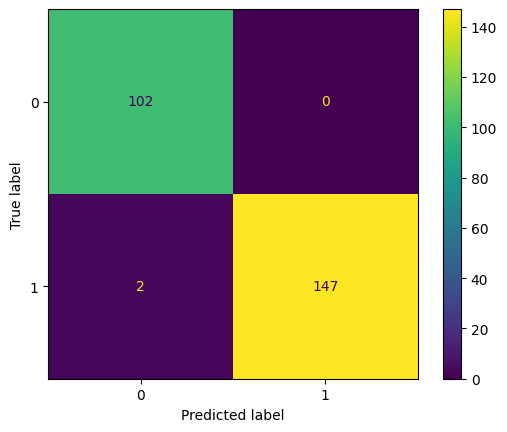

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       102
           1       1.00      0.99      0.99       149

    accuracy                           0.99       251
   macro avg       0.99      0.99      0.99       251
weighted avg       0.99      0.99      0.99       251



In [31]:
#Accuracy
Targets_prediction_train=KNN.predict(Features_train)
score_of_model_Train=accuracy_score(Targets_prediction_train, Targets_train)
print('Accuracy score of the train', KNN, ' = ',  score_of_model_Train)
Targets_prediction_test=KNN.predict(Features_test)
score_of_model_Test=accuracy_score(Targets_test, Targets_prediction_test)
print('Accuracy score of the test', KNN, ' = ',  score_of_model_Test)
#variance ,Bias and MSE
bias = np.mean((Targets_prediction_train-Targets_train ) ** 2)
variance = np.mean((Targets_prediction_train - np.mean(Targets_train)) ** 2)
mse_train = mean_squared_error(Targets_train,Targets_prediction_train)
print(f"Bias: {bias:.4f}")
print(f"Variance: {variance:.4f}")
print(f"MSE on training set: {mse_train:.4f}")

#classification_report
confusion_matrix = metrics.confusion_matrix(Targets_test,Targets_prediction_test)
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()
classification_report(Targets_test,Targets_prediction_test)
print(classification_report(Targets_test,Targets_prediction_test))


**This section for Testing New data**

In [45]:
path='/content/drive/MyDrive/Dataset/Real Data/Room1/Room1-test.csv'
df=pd.read_csv(path)
##data=pd.DataFrame(data.drop(['roomNum'],axis=1))
true_values=(data.indoor.values)
data= pd.DataFrame(df.drop(['indoor'],axis=1))
print(data)
print(true_values)

data.isnull().values.any()
data=data.drop_duplicates()
count_ones = np.sum(true_values== 1, axis=0)
count_zeros = np.sum(true_values== 0, axis=0)
print('ones',count_ones)
print('zeros',count_zeros)


     24:d3:f2:a7:b3:cd  b4:74:9f:ba:83:34  b0:89:00:74:7c:84  \
0                  -72                -53                -68   
1                 -100                -47                -69   
2                  -68                -56                -77   
3                  -64                -62                -77   
4                 -100                -39                -57   
..                 ...                ...                ...   
114                -77                -64                -69   
115                -76                -50                -55   
116               -100                -47                -55   
117               -100                -48                -55   
118                -75                -50                -55   

     9c:d6:43:cb:23:c0  30:99:35:90:32:9f  44:fb:5a:d2:d0:61  \
0                  -60                -80               -100   
1                  -55               -100               -100   
2                  -63                -

Accuracy score of the test KNeighborsClassifier(metric='manhattan', n_neighbors=7)  =  0.9911504424778761
[[32  1]
 [ 0 80]]


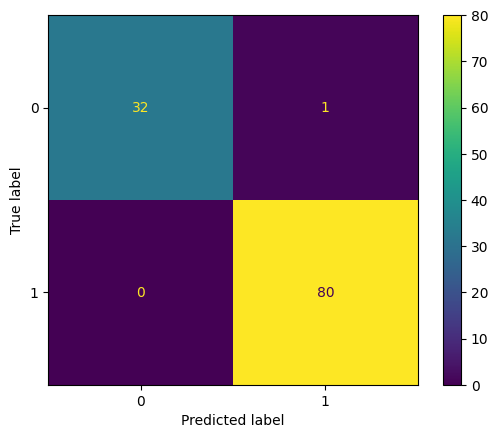

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.99      1.00      0.99        80

    accuracy                           0.99       113
   macro avg       0.99      0.98      0.99       113
weighted avg       0.99      0.99      0.99       113



In [46]:

predicted_values=KNN.predict(data)
score_of_model_Test=accuracy_score(true_values, predicted_values)
print('Accuracy score of the test', KNN, ' = ',  score_of_model_Test)

#classification_report
confusion_matrix = metrics.confusion_matrix(true_values,predicted_values)
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()
classification_report(true_values,predicted_values)
print(classification_report(true_values,predicted_values))
